In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

num_classes = 10
input_shape = (28, 28, 1)

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")


# # convert class vectors to binary class matrices
# y_train = tf.keras.utils.to_categorical(y_train, num_classes)
# y_test = tf.keras.utils.to_categorical(y_test, num_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Inspect and View Data

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)
5


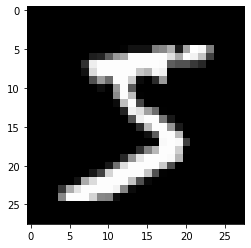

In [3]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train[0])
# print(X_train[0])
plt.imshow(X_train[0], cmap='gray')

## Normalize Data

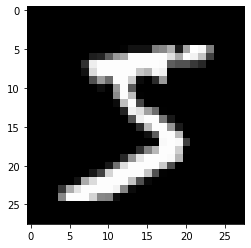

In [4]:
# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# print(X_train[0])
plt.imshow(X_train[0], cmap='gray')

## Build Model

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation=tf.nn.relu, input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax),
])

## Compile and Fit model

In [6]:
# hyperparameters to play with

epochs = 5
batch_size = None
learning_rate=0.001
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(
    optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"]
)


model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=batch_size)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5460 - accuracy: 0.9175 - val_loss: 1.4941 - val_accuracy: 0.9674
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4865 - accuracy: 0.9752 - val_loss: 1.4796 - val_accuracy: 0.9821
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4803 - accuracy: 0.9811 - val_loss: 1.4750 - val_accuracy: 0.9864
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4784 - accuracy: 0.9829 - val_loss: 1.4789 - val_accuracy: 0.9821
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4772 - accuracy: 0.9839 - val_loss: 1.4778 - val_accuracy: 0.9832


## Model Summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1

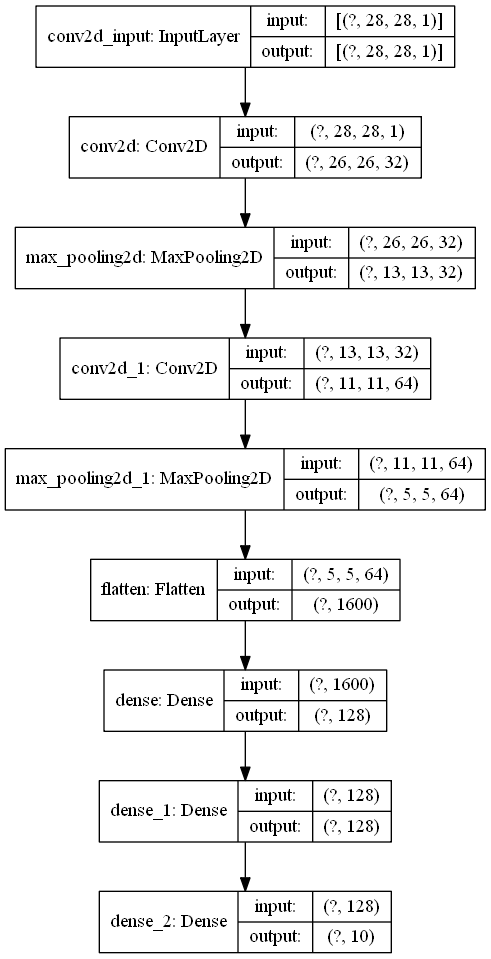

In [8]:
model.summary()
tf.keras.utils.plot_model(
    model, to_file='model_conv.png', show_shapes=True, show_layer_names=True,
)

In [9]:
val_loss, val_accuracy = model.evaluate(X_test, y_test)
print(val_loss, val_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 1.4778 - accuracy: 0.9832
1.4778023958206177 0.9832000136375427


## Plot loss and Accuracy charts

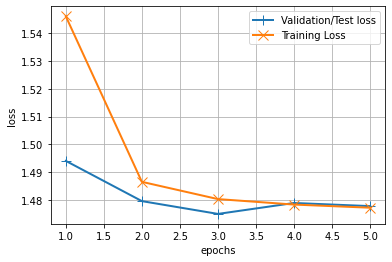

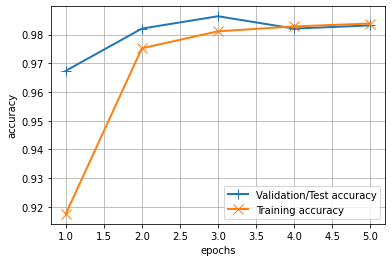

In [7]:
model_dict = model.history.history


loss_values = model_dict['loss']
val_loss_values = model_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

line_1 = plt.plot(epochs, val_loss_values, label='Validation/Test loss')
line_2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line_1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line_2, linewidth=2.0, marker='x', markersize=10.0)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid(True)
plt.legend()
plt.show()



loss_values = model_dict['accuracy']
val_loss_values = model_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

line_1 = plt.plot(epochs, val_loss_values, label='Validation/Test accuracy')
line_2 = plt.plot(epochs, loss_values, label='Training accuracy')
plt.setp(line_1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line_2, linewidth=2.0, marker='x', markersize=10.0)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()
plt.show()


In [10]:
model.save('simple_mnist_conv_model.h5')

In [11]:
new_model = tf.keras.models.load_model('simple_mnist_conv_model.h5')

In [12]:
predictions = new_model.predict([X_test])
print(predictions)

[[9.9851784e-37 0.0000000e+00 9.0050810e-36 ... 1.0000000e+00
  0.0000000e+00 2.6557322e-27]
 [2.5457780e-31 2.9669111e-36 1.0000000e+00 ... 0.0000000e+00
  4.7549781e-31 0.0000000e+00]
 [2.7062982e-13 1.0000000e+00 3.0485828e-16 ... 1.5834374e-16
  1.9358615e-16 4.5253868e-18]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.0799730e-35
  5.4102481e-27 6.3483428e-38]
 [3.7772241e-33 1.0090898e-37 0.0000000e+00 ... 0.0000000e+00
  6.7620551e-16 2.4567699e-34]
 [2.8274816e-23 8.3313255e-36 4.5412388e-28 ... 0.0000000e+00
  1.2203664e-28 1.9509187e-38]]


6


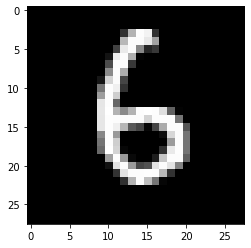

In [13]:
print(np.argmax(predictions[21]))
plt.imshow(X_test[21], cmap='gray')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.98      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.99      0.99       892
           6       1.00      0.96      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.94      1.00      0.97       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg    

<AxesSubplot:>

<Figure size 720x504 with 0 Axes>

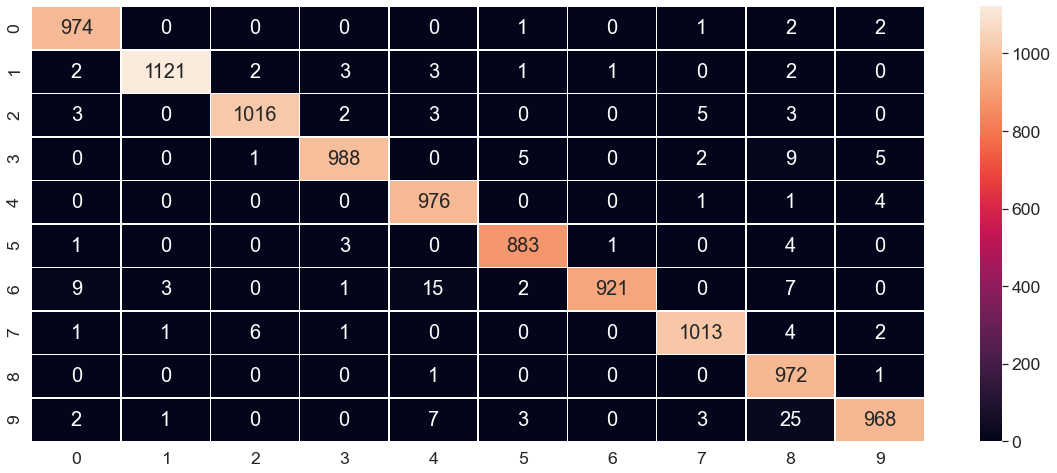

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
plt.figure(figsize = (10,7))



y_pred = model.predict_classes(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)
print(confusion_matrix)

sns.set(font_scale=1.6) # for label size
plt.figure(figsize = (20,8))
sns.heatmap(confusion_matrix, annot=True, fmt='g', annot_kws={"size": 20}, linewidths=0.5)
